In [1]:
# Import the relevant libraries

import pandas as pd                # Manage the dataframe 
import matplotlib.pyplot as plt    # Visualizations
import seaborn as sns              # Visulizations

In [87]:
# Import the data from comaseperated file to pandas dataframe

raw_data = pd.read_csv("repair_catagorization.csv")
raw_data.head()

,Location,Length,Width,%_material,OH_Fasteners,Spar_Fasteners,Interface,Complexity
0,12-14,146,30,0.23,7,0,Yes,2
1,20-27,102,61,0.43,5,3,Yes,1
2,5-7,126,37,0.24,6,0,No,1
3,20-27,102,87,0.01,5,3,No,1
4,20-27,83,61,0.40,4,3,No,1


In [141]:
# summarize the class distribution
from collections import Counter
target = raw_data.values[:,-1]
counter = Counter(target)
print(counter)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.2f%%' % (k, v, per))

Counter({1: 41, 2: 33, 3: 17, 4: 9})
Class=2, Count=33, Percentage=33.00%
Class=1, Count=41, Percentage=41.00%
Class=4, Count=9, Percentage=9.00%
Class=3, Count=17, Percentage=17.00%


The above distribution shows that the dataset is highly skewed

In [88]:
# Check the datatypes of the columns in the dataset

raw_data.dtypes

Location           object
Length              int64
Width               int64
%_material        float64
OH_Fasteners        int64
Spar_Fasteners      int64
Interface          object
Complexity          int64
dtype: object

We have three columns with Catagorical data (**Location, Interface and Complexity**), rest of the columns have numeric data.

The catagorical data needs to be converted to numerical values before proceding to actual analysis.

**Complexity column is the target column.**

In [89]:
# Check the information of columns with object as datatype

obj_type = []
for i in range(len(raw_data.dtypes)):
    if raw_data.dtypes[i] == "object":
        obj_type.append(i)

raw_data.iloc[:, obj_type].describe()

,Location,Interface
count,100,100
unique,10,2
top,12-14,No
freq,13,55


#### Location:
There are 10 distinct locations. These are spanwise rib locations where the damage was identified and an initial repair has been carried out. This include removal of paint and protective layers, clearing the corrosion by blending.

#### Interface:
There are two distinct input in this column. This column provides the information on where exactly the damage was found. Is there any attachment at the damaged location.

In [90]:
raw_data["Interface"] = raw_data["Interface"].apply(lambda x: 0 if x == "No" else 1)
raw_data.head()

,Location,Length,Width,%_material,OH_Fasteners,Spar_Fasteners,Interface,Complexity
0,12-14,146,30,0.23,7,0,1,2
1,20-27,102,61,0.43,5,3,1,1
2,5-7,126,37,0.24,6,0,0,1
3,20-27,102,87,0.01,5,3,0,1
4,20-27,83,61,0.40,4,3,0,1


In [91]:
raw_data.describe()

,Length,Width,%_material,OH_Fasteners,Spar_Fasteners,Interface,Complexity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000
mean,112.490000,57.430000,0.408100,5.670000,2.950000,0.45,1.940000
std,40.991129,17.914079,0.192777,2.055075,2.001893,0.50,0.972553
min,42.000000,30.000000,0.000000,2.000000,0.000000,0.00,1.000000
25%,77.500000,41.750000,0.270000,4.000000,2.000000,0.00,1.000000
50%,111.500000,57.000000,0.440000,6.000000,3.000000,0.00,2.000000
75%,146.750000,70.000000,0.600000,7.000000,5.000000,1.00,3.000000
max,180.000000,90.000000,0.600000,9.000000,6.000000,1.00,4.000000


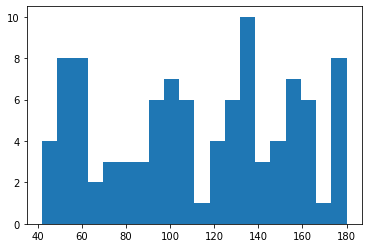

In [92]:
plt.hist(raw_data.Length, bins = 20);

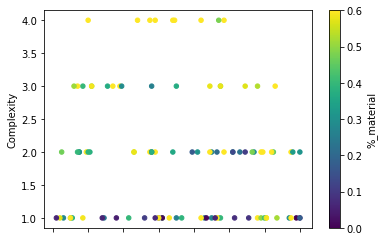

In [93]:
raw_data.plot.scatter(x = "Length", y = "Complexity", c = "%_material", cmap = "viridis")

We see that length is not predominantly driving the complexity of the repair. However, as the **% material loss** increases, we see more number of repairs being catagorised as **Catagory 4** complixity and as the **material loss in low**, the repairs are catagorised as less complex (**Catagory 1**).

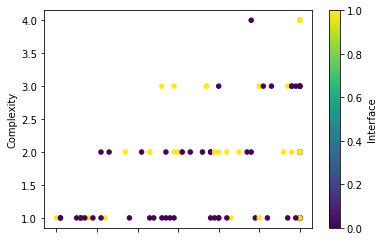

In [94]:
raw_data.plot.scatter(x = "%_material", y = "Complexity", c = "Interface", cmap = "viridis")

The second graph also confirms the assumption as the % depth is increasing, the complexity of the repair is also increasing. 

Further this graph tells us another key information:
The complexity of repair is relatively high for damage locations at the Interface. This is because, the presence of interface calls for high skiled operators and also a **complex / bespoke solutions.**

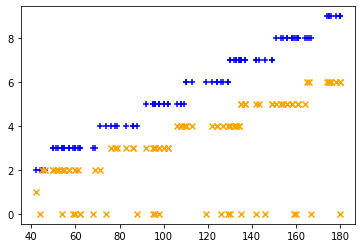

In [95]:
plt.scatter(raw_data.Length, raw_data.OH_Fasteners, color = 'blue', marker = '+')
plt.scatter(raw_data.Length, raw_data.Spar_Fasteners, color = 'orange', marker = 'x')

From the above plot we see that there is a linear correlation between the **Length** and **OH_Fasteners**, **Spar_Fasteners**. 

This could also be intutively deduced that: **As the length of the damage increases, more number of fasteners are affected along the Overhang and on the Spar**.

**Observation:** There are few repair locations with zero Spar fasteners affected.

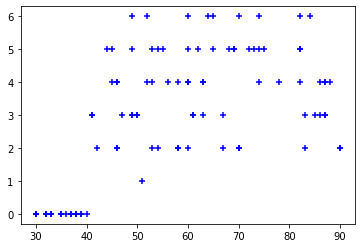

In [97]:
plt.scatter(raw_data.Width, raw_data.Spar_Fasteners, color = 'blue', marker = '+')

The above graph gives a visual confirmation that for locations where the damage is contained in Overhang region alons (Width < 40mm) has no Spar fasteners affected.

From above two graph, we see that there is a direct correlation between **Length of the repair/damage and Number of Fasteners (affected at Overhang and Spar)**. Further Width is also not providing any conclusive decision boundary for analysing the complexity of the repair, therefore, **Length and Width** columns can be droped from the analysis features.


We can further check and confirm these assumptions based on **Correlation Coefficient**.

In [103]:
raw_data.corr()

,Length,Width,%_material,OH_Fasteners,Spar_Fasteners,Interface,Complexity
Length,1.000000,0.095312,-0.055140,0.990818,0.563453,-0.093171,-0.126195
Width,0.095312,1.000000,-0.022137,0.103765,0.601392,-0.007161,-0.107501
%_material,-0.055140,-0.022137,1.000000,-0.061006,0.040583,0.179775,0.422852
OH_Fasteners,0.990818,0.103765,-0.061006,1.000000,0.572933,-0.099778,-0.136353
Spar_Fasteners,0.563453,0.601392,0.040583,0.572933,1.000000,0.002523,-0.110507
Interface,-0.093171,-0.007161,0.179775,-0.099778,0.002523,1.000000,0.305351
Complexity,-0.126195,-0.107501,0.422852,-0.136353,-0.110507,0.305351,1.000000


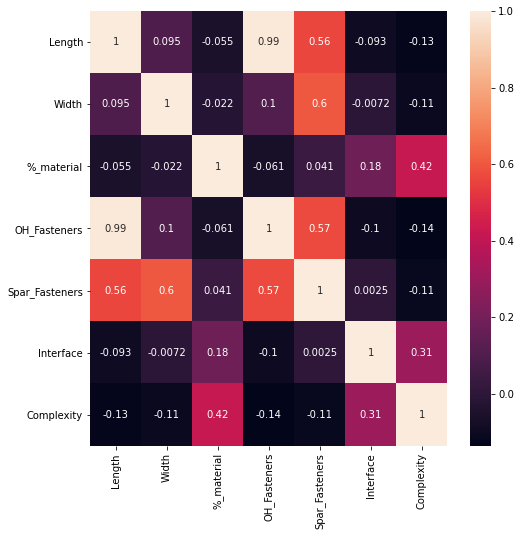

In [117]:
plt.figure(figsize = (8,8))
sns.heatmap(raw_data.corr(), annot = True)

Finally, the location column is handled by using One Hot Encoding (using pandas get_dummies method). 

https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

In [118]:
dummies = pd.get_dummies(raw_data.Location)
dummies.head()

,1-5,10-11,11-12,12-14,14-15,15-16,16-20,20-27,5-7,8-10
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


Once the dummy columns are created for Location Column, one of the column needs to be deleted from the dummies dataframe. This will avoid Dummy Variable Trap.

https://www.algosome.com/articles/dummy-variable-trap-regression.html#:~:text=The%20Dummy%20Variable%20trap%20is,%2Ffemale)%20as%20an%20example.

In [120]:
raw_data_1 = pd.concat([raw_data, dummies.drop("20-27", axis = 1)], axis = 1)
raw_data_1.head()

,Location,Length,Width,%_material,OH_Fasteners,Spar_Fasteners,Interface,Complexity,1-5,10-11,11-12,12-14,14-15,15-16,16-20,5-7,8-10
0,12-14,146,30,0.23,7,0,1,2,0,0,0,1,0,0,0,0,0
1,20-27,102,61,0.43,5,3,1,1,0,0,0,0,0,0,0,0,0
2,5-7,126,37,0.24,6,0,0,1,0,0,0,0,0,0,0,1,0
3,20-27,102,87,0.01,5,3,0,1,0,0,0,0,0,0,0,0,0
4,20-27,83,61,0.40,4,3,0,1,0,0,0,0,0,0,0,0,0


In [124]:
final_data = raw_data_1.drop(["Location", "Length", "Width"], axis = 1)
final_data.head()

,%_material,OH_Fasteners,Spar_Fasteners,Interface,Complexity,1-5,10-11,11-12,12-14,14-15,15-16,16-20,5-7,8-10
0,0.23,7,0,1,2,0,0,0,1,0,0,0,0,0
1,0.43,5,3,1,1,0,0,0,0,0,0,0,0,0
2,0.24,6,0,0,1,0,0,0,0,0,0,0,1,0
3,0.01,5,3,0,1,0,0,0,0,0,0,0,0,0
4,0.40,4,3,0,1,0,0,0,0,0,0,0,0,0


Finally the columns "Location", "Length" and "Width" are dropped from the dataset before creating the X and y dataset for analysis

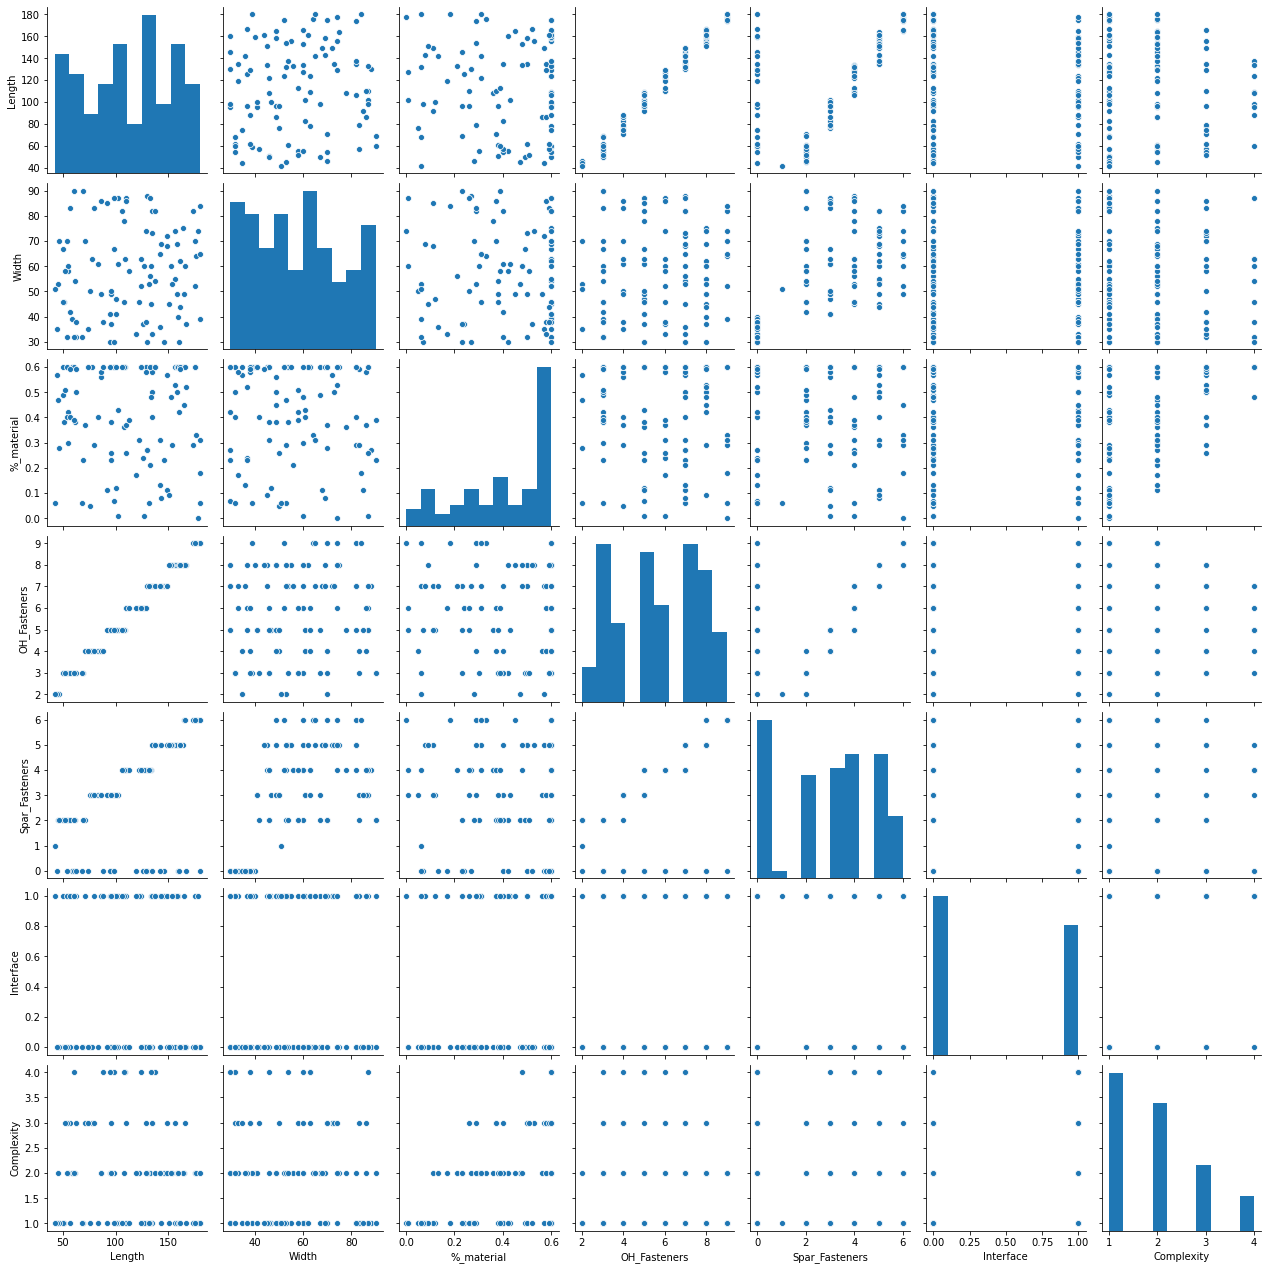

In [131]:
sns.pairplot(raw_data_1[["Length","Width","%_material","OH_Fasteners","Spar_Fasteners","Interface","Complexity"]])

In [125]:
X = final_data.drop("Complexity", axis = 1)
y = final_data.Complexity

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

log_regcv = LogisticRegressionCV(max_iter=15000)
log_regcv.fit(X_train, y_train)
log_regcv.score(X_test, y_test)

0.65

### Use K Fold cross Validation to measure accuravy of the Logistic Regression Model

In [148]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
scores = cross_val_score(LogisticRegressionCV(max_iter = 15000), X, y, cv=cv)

print(scores)
print('Mean Accuracy for Logistic regression is: %.3f with a standard deviation of %.3f' % (np.mean(scores), np.std(scores)))

[0.65 0.7  0.65 0.75 0.7 ]
Mean Accuracy for Logistic regression is: 0.690 with a standard deviation of 0.037


We see that the maximum score is 0.75 from the 5 iterations using Logistic Regression Classifier.

**The scores are varying between 0.65 to 0.75.** 

More consistant results can be predicted by collecting more data and performing the analysis.

In [168]:
from sklearn.model_selection import GridSearchCV

def best_model(X, y):
    algos = {
        'Log_CV': {
            'model': LogisticRegressionCV(max_iter = 15000),
            'params': {
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }
        },
        'Rand_Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ["gini", "entropy"],
                'max_depth': [5, 10, 15, 20, 25]
            }
        },
       'KNN_Class': {
            'model': KNeighborsClassifier(),
            'params': {
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        },
        'SVC': {
            'model': SVC(),
            'params': {
                'gamma': ['scale', 'auto']
            }
        },
        'Ex_Tree_Class': {
            'model': ExtraTreesClassifier(),
            'params': {
                'criterion': ["gini", "entropy"],
                'max_depth': [5, 10, 15, 20, 25]
            }
        },
        'Bag_Class': {
            'model': BaggingClassifier(),
            'params': {
                'warm_start': [True, False]
            }
        }
    }
    
    scores_1 = []
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores_1.append({
            'Model': algo_name,
            'Best Parameters': gs.best_params_,
            'Best Score': gs.best_score_
        })
        #print("finished", algo_name)
    
    return pd.DataFrame(scores_1, columns = ['Model', 'Best Parameters', 'Best Score'])

best_model(X, y)

,Model,Best Parameters,Best Score
0,Log_CV,{'solver': 'sag'},0.656667
1,Rand_Forest,"{'criterion': 'gini', 'max_depth': 10}",0.630000
2,KNN_Class,"{'algorithm': 'ball_tree', 'weights': 'distance'}",0.400000
3,SVC,{'gamma': 'scale'},0.400000
4,Ex_Tree_Class,"{'criterion': 'gini', 'max_depth': 10}",0.670000
5,Bag_Class,{'warm_start': True},0.566667


#### From above plot we see that the Extra Tree Classifier, Logistic classifier and Random forest Regression Classifier performs better with the available data.

In [156]:
models = [LogisticRegressionCV(), RandomForestClassifier(), 
          KNeighborsClassifier(), SVC(), 
          ExtraTreesClassifier(), BaggingClassifier()]

names = ["Log_CV", "Rand_Forest", "KNN_Class",
        "SCV", "Ex_Tree_Class", "Bag_Class"]

results = list()

from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

for i in range(len(models)):
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    print('>Scores for %s: max = %.3f, mean = %.3f, std = %.3f' % (names[i], max(scores), np.mean(scores), np.std(scores)))


>Scores for Log_CV: max = 0.900, mean = 0.657, std = 0.098
>Scores for Rand_Forest: max = 0.850, mean = 0.620, std = 0.096
>Scores for KNN_Class: max = 0.400, mean = 0.327, std = 0.054
>Scores for SCV: max = 0.450, mean = 0.400, std = 0.026
>Scores for Ex_Tree_Class: max = 0.800, mean = 0.643, std = 0.093
>Scores for Bag_Class: max = 0.750, mean = 0.587, std = 0.102


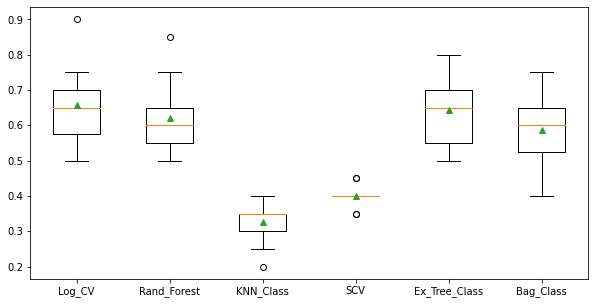

In [160]:
plt.figure(figsize = (10,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### From above plot we see that the Random forest classifier and Logestic Regression Classifier performs better with the available data. The Extra Tree Classifier also performs good (has higher max score) but also the score values are more spreadout for Extra Tree Classifier.

**Finally Logistic Regression is selected for building a model**